# 02 - Themes & Styling in Seaborn

## Goal
Learn how to make Seaborn plots look consistent, readable, and publication-ready using themes, context scaling, `despine`, and color palettes.

## Quick cheat sheet
| Task | Recommended API | Notes |
|---|---|---|
| Set overall look (style + fonts + palette) | `sns.set_theme(...)` | Prefer this for consistent global defaults. |
| Change only axes background/grid | `sns.set_style(...)` | Styles: `white`, `dark`, `whitegrid`, `darkgrid`, `ticks`. |
| Scale for audiences | `sns.set_context(...)` | Contexts: `paper`, `notebook`, `talk`, `poster`. |
| Remove plot frame lines | `sns.despine(...)` | Cleaner plots; useful for papers/slides. |
| Pick / preview palettes | `sns.color_palette(...)`, `sns.palplot(...)` | Use categorical, sequential, or diverging palettes. |

## Best practices (fast revision)
- Prefer `with sns.axes_style(...):` and `with sns.plotting_context(...):` in notebooks to avoid global side effects.
- Use categorical palettes for categories, sequential palettes for ordered magnitude, and diverging palettes when values have a meaningful midpoint (e.g., 0).
- Use `sns.set_theme()` at the start of a notebook to keep plots consistent.


In [1]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# A good default starting point
sns.set_theme(style="darkgrid", context="notebook")

tips = sns.load_dataset('tips')
penguins = sns.load_dataset('penguins')

print('tips shape:', tips.shape)
print('penguins shape:', penguins.shape)


tips shape: (244, 7)
penguins shape: (344, 7)


## 1) Built-in themes & styles
Seaborn styling is mainly controlled through three related ideas:
- **Theme** (`sns.set_theme`) sets style + context + palette (recommended global entry point).
- **Style** (`sns.set_style`) controls axes look (background, grid, spines).
- **Context** (`sns.set_context`) scales fonts/lines/markers for different audiences (covered next).

### Styles available
- `white`
- `dark`
- `whitegrid`
- `darkgrid`
- `ticks`

Tip: for comparisons in the same notebook, prefer context managers so each plot is isolated.


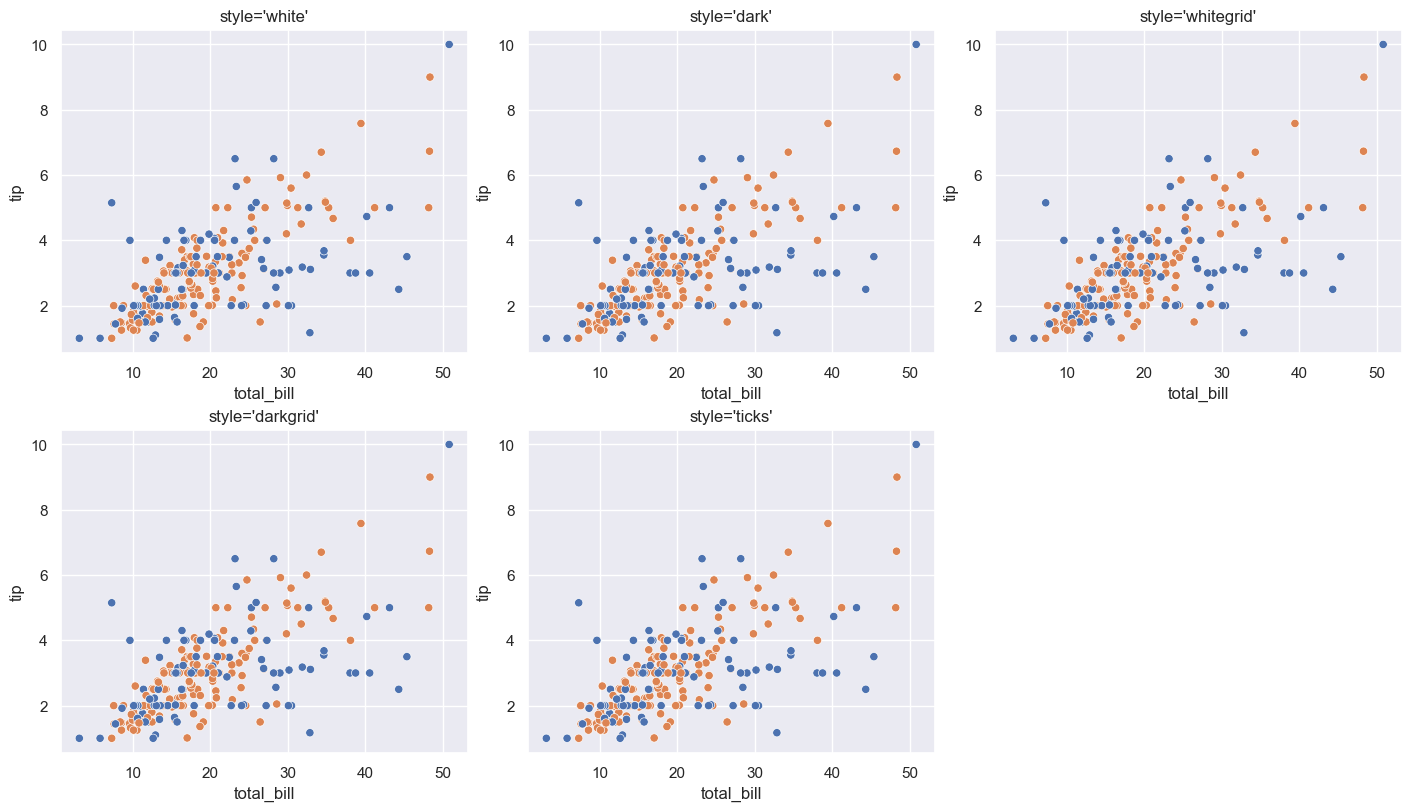

In [2]:
# Compare built-in styles using the same plot
styles = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']

fig, axes = plt.subplots(2, 3, figsize=(14, 8), constrained_layout=True)
axes = axes.ravel()

for i, style in enumerate(styles):
    ax = axes[i]
    with sns.axes_style(style):
        sns.scatterplot(
            data=tips,
            x='total_bill',
            y='tip',
            hue='smoker',
            ax=ax
        )
        ax.set_title(f"style='{style}'")
        ax.legend_.remove()

# Hide the 6th empty subplot
axes[-1].axis('off')
plt.show()


### `set_theme()` vs `set_style()`
- Use `sns.set_theme(...)` once at the top when you want a consistent look across the notebook.
- Use `sns.set_style(...)` (or `with sns.axes_style(...)`) when you only want to change the axes appearance.

Example: `set_theme` can set multiple aspects at once (style, palette, context).


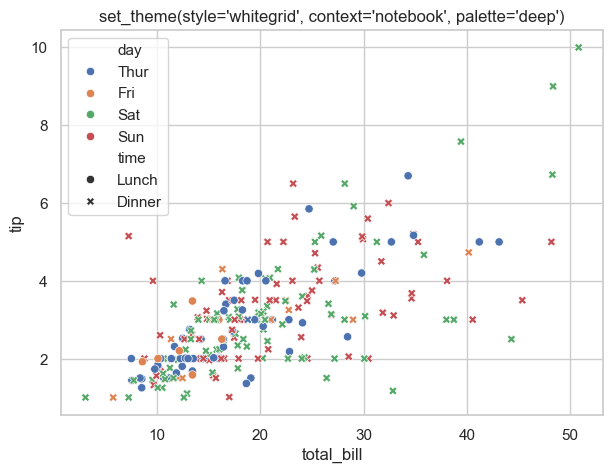

In [3]:
# Example: One-liner to set multiple defaults
sns.set_theme(style='whitegrid', context='notebook', palette='deep')

plt.figure(figsize=(7, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time')
plt.title("set_theme(style='whitegrid', context='notebook', palette='deep')")
plt.show()


## 2) Context scaling (`set_context`)
Context controls scale of plot elements (fonts, linewidths, marker sizes).

### Common contexts
| Context | When to use |
|---|---|
| `paper` | Small figures in papers/reports. |
| `notebook` | Default interactive analysis. |
| `talk` | Presentations; readable from a distance. |
| `poster` | Large fonts/lines for posters. |

Note: context changes *scale*, not the color palette or background style.


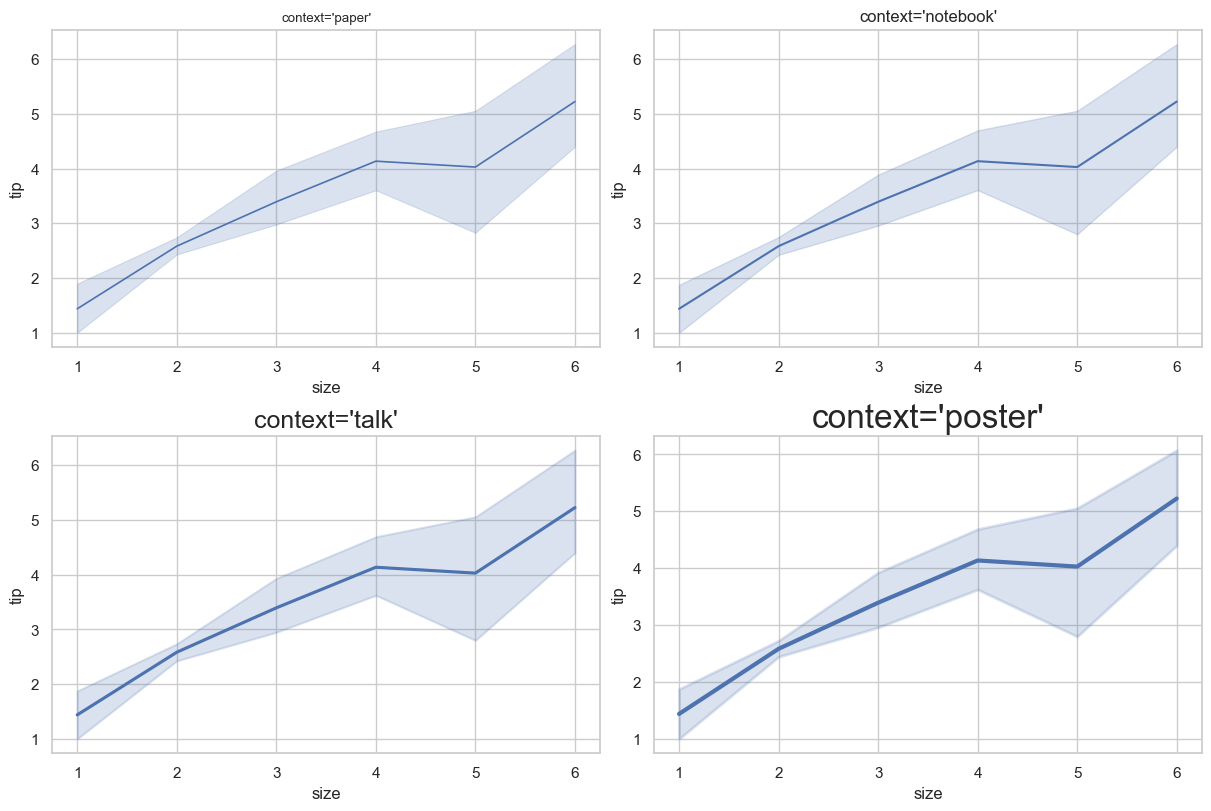

In [4]:
# Compare contexts side-by-side
contexts = ['paper', 'notebook', 'talk', 'poster']

fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axes = axes.ravel()

for ax, ctx in zip(axes, contexts):
    with sns.plotting_context(ctx):
        sns.lineplot(
            data=tips,
            x='size',
            y='tip',
            estimator='mean',
            errorbar=('ci', 95),
            ax=ax
        )
        ax.set_title(f"context='{ctx}'")

plt.show()


### Extra control (optional, but useful)
`set_context` supports `font_scale` and `rc` overrides when you need fine tuning.

Example:
```python
sns.set_context('talk', font_scale=1.1, rc={'lines.linewidth': 2.5})
```


## 3) Removing spines (`despine`)
Spines are the lines that form the plot frame. Removing top/right spines often makes a plot cleaner.

### Key options
- `sns.despine()` removes top and right spines (default).
- `left=False`, `bottom=False` keeps those spines if desired.
- `trim=True` trims spines to the range of the ticks.
- `offset=int` offsets spines outward (nice for dense plots).


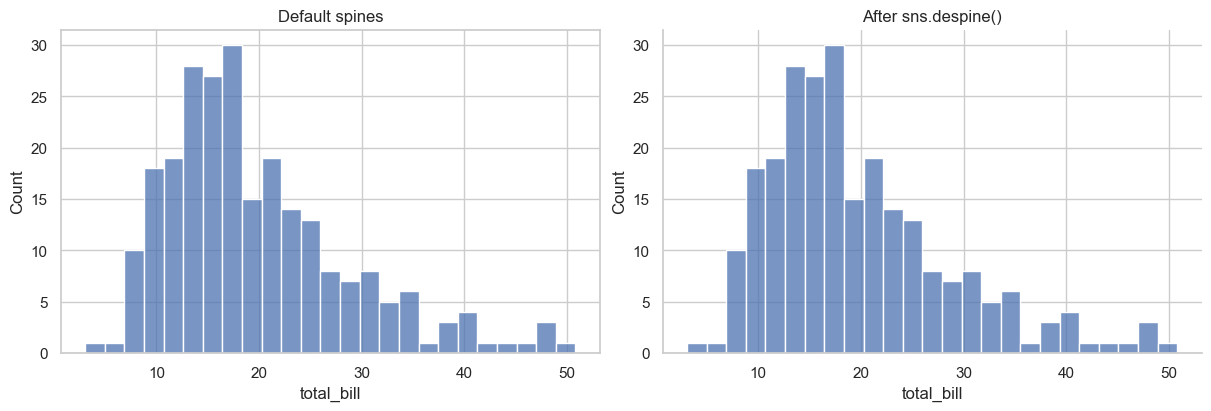

In [5]:
# Before vs after: despine
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

sns.histplot(data=tips, x='total_bill', bins=25, ax=axes[0])
axes[0].set_title('Default spines')

sns.histplot(data=tips, x='total_bill', bins=25, ax=axes[1])
sns.despine(ax=axes[1])
axes[1].set_title('After sns.despine()')

plt.show()


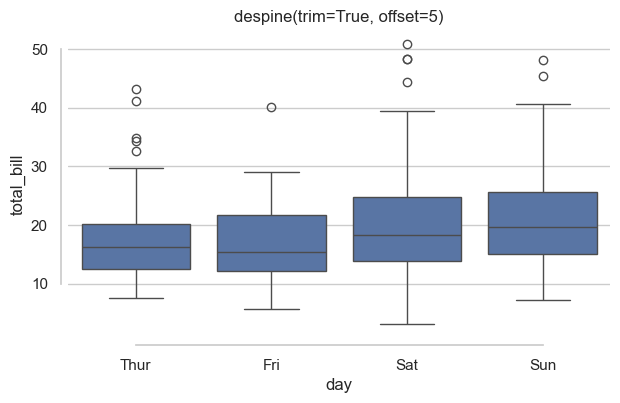

In [6]:
# More despine examples
plt.figure(figsize=(7, 4))
ax = sns.boxplot(data=tips, x='day', y='total_bill')
sns.despine(trim=True, offset=5)
plt.title('despine(trim=True, offset=5)')
plt.show()


## 4) Color palettes
A color palette is a list of colors that Seaborn uses in plots. Palette choice should match the data type.

### Palette types
- **Categorical**: for categories (e.g., species, day of week). Examples: `deep`, `muted`, `colorblind`, `Set2`, `tab10`.
- **Sequential**: for ordered magnitude (low → high). Examples: `rocket`, `mako`, `viridis`.
- **Diverging**: for values around a midpoint (negative ↔ positive). Examples: `vlag`, `icefire`, `coolwarm`.

### Useful functions
- `sns.color_palette(name, n_colors=...)` returns a list of colors.
- `sns.palplot(palette)` previews the palette.
- `sns.set_palette(name_or_list)` sets the default palette globally.


categorical (colorblind)


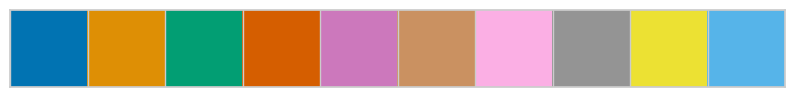

categorical (Set2)


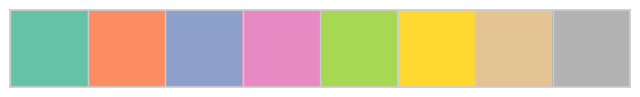

sequential (rocket)


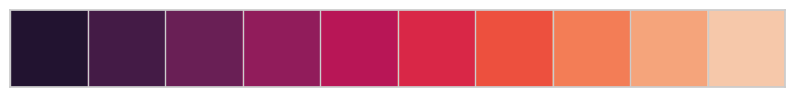

diverging (vlag)


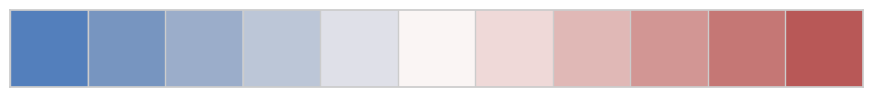

In [7]:
# Preview a few palettes
palettes = {
    'categorical (colorblind)': sns.color_palette('colorblind', 10),
    'categorical (Set2)': sns.color_palette('Set2', 8),
    'sequential (rocket)': sns.color_palette('rocket', 10),
    'diverging (vlag)': sns.color_palette('vlag', 11),
}

for title, pal in palettes.items():
    print(title)
    sns.palplot(pal)
    plt.show()


### Apply a categorical palette (categories)
When `hue` is categorical, choose a categorical palette (good default: `colorblind`).


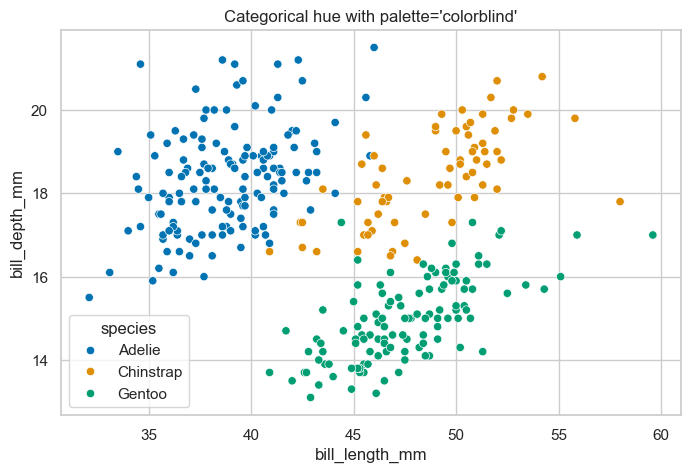

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=penguins.dropna(),
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette='colorblind'
)
plt.title("Categorical hue with palette='colorblind'")
plt.show()


### Apply a sequential palette (ordered magnitude)
For a numeric variable that represents magnitude, use a sequential palette.

Tip: if `hue` is numeric, Seaborn treats it as continuous and the palette behaves like a colormap.


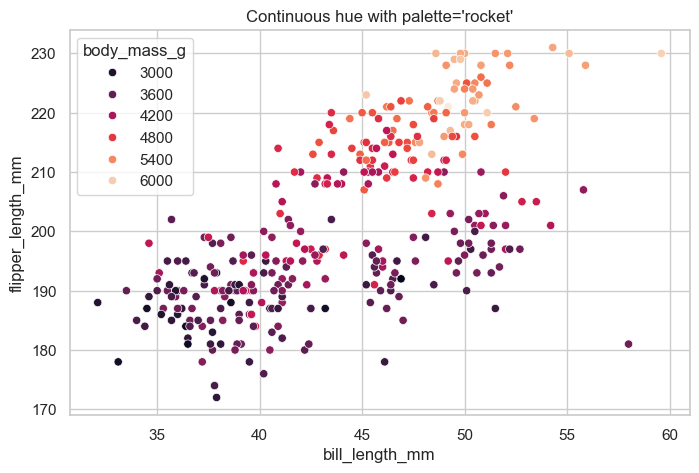

In [9]:
# Sequential palette with continuous hue
p = penguins.dropna().copy()

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=p,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='body_mass_g',
    palette='rocket',
    legend='brief'
)
plt.title("Continuous hue with palette='rocket'")
plt.show()


### Apply a diverging palette (midpoint matters)
Diverging palettes are useful when values diverge around a meaningful midpoint (often 0).

Example below creates a synthetic variable centered around 0 to demonstrate a diverging palette.


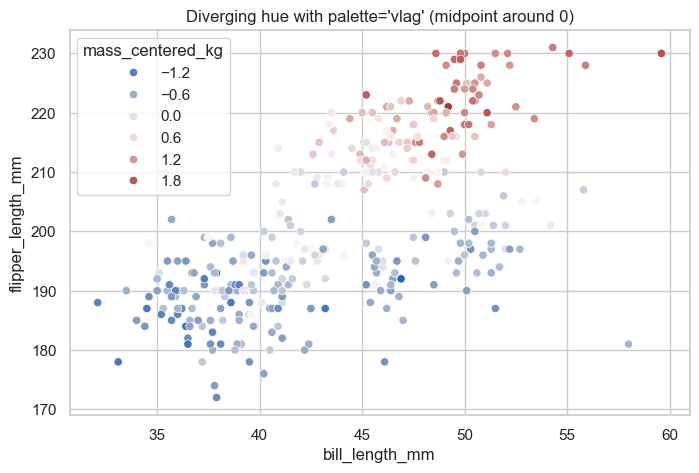

In [10]:
# Diverging palette demo with a centered variable
p = penguins.dropna().copy()
p['mass_centered_kg'] = (p['body_mass_g'] - p['body_mass_g'].mean()) / 1000.0

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=p,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='mass_centered_kg',
    palette='vlag',
    legend='brief'
)
plt.title("Diverging hue with palette='vlag' (midpoint around 0)")
plt.show()


---
## Practice set
Use the `tips` and `penguins` datasets already loaded. Try to write each plot in a clean, repeatable way.

### A) Styles
1. Create a 1x3 grid showing `style='whitegrid'`, `style='ticks'`, and `style='dark'`.
2. Use the same scatter plot each time: `total_bill` vs `tip` with `hue='sex'`.

### B) Context
3. Create the same line plot (tip vs size) with contexts: `paper` and `talk`.
4. Use `font_scale=1.2` for the talk version.

### C) Despine
5. Make a boxplot of `total_bill` by `day` and apply `despine(trim=True)`.

### D) Palettes
6. For `penguins`, plot `bill_length_mm` vs `bill_depth_mm` with `hue='species'` using a categorical palette of your choice.
7. Plot the same with `hue='body_mass_g'` using a sequential palette.

### Challenge
8. Write a small helper function `plot_bill_tip(style, context)` that produces a styled scatterplot using context managers.


In [11]:
# Practice solutions template (fill TODOs)

# A) Styles
# TODO: Create a 1x3 subplot grid and compare styles

# B) Context
# TODO: Compare 'paper' vs 'talk' with font_scale

# C) Despine
# TODO: Boxplot + despine(trim=True)

# D) Palettes
# TODO: Categorical hue with a categorical palette
# TODO: Continuous hue with a sequential palette

# Challenge
def plot_bill_tip(style: str, context: str):
    # TODO: Use context managers to avoid global side effects
    # with sns.axes_style(style):
    #     with sns.plotting_context(context):
    #         plt.figure(figsize=(7, 5))
    #         sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
    #         plt.title(f"style={style}, context={context}")
    #         plt.show()
    pass


## Reference links
- Seaborn styling (themes, context, palettes): https://seaborn.pydata.org/tutorial/aesthetics.html
- Color palettes gallery: https://seaborn.pydata.org/tutorial/color_palettes.html
